# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from pprint import pprint
import scipy.stats as st

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#!pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"



city_data = []


record_count = 1
set_count = 1


for i, city in enumerate(cities):
        
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    city_url = url + "&q=" + city
    
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    
    record_count += 1

    
    try:
        
        city_weather = requests.get(city_url).json()

        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

       
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

 
    except Exception as e:
        print(f"City not found. Skipping...{e}")
        print(city_weather)
        
        


Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | coos bay
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | kahului
Processing Record 8 of Set 1 | newport
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | kitale
Processing Record 11 of Set 1 | vostok
Processing Record 12 of Set 1 | aquiraz
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | gao
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | los llanos de aridane
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | tshane
Processing Record 21 of Set 1 | noumea
Processing Record 22 of Set 1 | kloulklubed
Processing Record 23 of Set 1 | castro
Processing Record 24 of Set 1 | dingle
Processing Record 25 of Set 1 

Processing Record 18 of Set 4 | gurskoye
City not found. Skipping...'coord'
{'cod': '404', 'message': 'city not found'}
Processing Record 19 of Set 4 | port hedland
Processing Record 20 of Set 4 | maningrida
Processing Record 21 of Set 4 | hasaki
Processing Record 22 of Set 4 | fort nelson
Processing Record 23 of Set 4 | kuala terengganu
Processing Record 24 of Set 4 | antofagasta
Processing Record 25 of Set 4 | kyra
Processing Record 26 of Set 4 | malm
Processing Record 27 of Set 4 | san carlos de bariloche
Processing Record 28 of Set 4 | lebu
Processing Record 29 of Set 4 | fenelon falls
Processing Record 30 of Set 4 | faanui
Processing Record 31 of Set 4 | yellowknife
Processing Record 32 of Set 4 | artyk
City not found. Skipping...'coord'
{'cod': '404', 'message': 'city not found'}
Processing Record 33 of Set 4 | stephenville
Processing Record 34 of Set 4 | macusani
Processing Record 35 of Set 4 | san cristobal
Processing Record 36 of Set 4 | souillac
Processing Record 37 of Set 4 

Processing Record 36 of Set 7 | dongobesh
Processing Record 37 of Set 7 | griffith
Processing Record 38 of Set 7 | nicoya
Processing Record 39 of Set 7 | owando
Processing Record 40 of Set 7 | ordzhonikidze
Processing Record 41 of Set 7 | vore
Processing Record 42 of Set 7 | kangaatsiaq
Processing Record 43 of Set 7 | akyab
Processing Record 44 of Set 7 | moranbah
Processing Record 45 of Set 7 | hami
Processing Record 46 of Set 7 | alofi
Processing Record 47 of Set 7 | bijie
Processing Record 48 of Set 7 | ixtapa
Processing Record 49 of Set 7 | beringovskiy
Processing Record 0 of Set 8 | las palmas
Processing Record 1 of Set 8 | nouadhibou
Processing Record 2 of Set 8 | ballina
Processing Record 3 of Set 8 | itarema
Processing Record 4 of Set 8 | padang
Processing Record 5 of Set 8 | airai
Processing Record 6 of Set 8 | enshi
Processing Record 7 of Set 8 | yulara
Processing Record 8 of Set 8 | berlevag
Processing Record 9 of Set 8 | lashio
Processing Record 10 of Set 8 | xichang
Proces

Processing Record 18 of Set 11 | taikang
Processing Record 19 of Set 11 | terra santa
Processing Record 20 of Set 11 | dharchula
Processing Record 21 of Set 11 | puerto madryn
Processing Record 22 of Set 11 | dolores
Processing Record 23 of Set 11 | half moon bay
Processing Record 24 of Set 11 | pont-audemer
Processing Record 25 of Set 11 | cockburn town
Processing Record 26 of Set 11 | palmer
Processing Record 27 of Set 11 | kochevo
Processing Record 28 of Set 11 | kapit
Processing Record 29 of Set 11 | terlicko
City not found. Skipping...'coord'
{'cod': '404', 'message': 'city not found'}
Processing Record 30 of Set 11 | ozgon
City not found. Skipping...'coord'
{'cod': '404', 'message': 'city not found'}
Processing Record 31 of Set 11 | darhan
Processing Record 32 of Set 11 | vila velha
Processing Record 33 of Set 11 | urumqi
Processing Record 34 of Set 11 | pascagoula
Processing Record 35 of Set 11 | rapid valley
Processing Record 36 of Set 11 | methoni
Processing Record 37 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,76.84,78,18,19.91,PF,1614456980
1,albany,42.6001,-73.9662,44.01,96,100,1.01,US,1614456969
2,saskylakh,71.9167,114.0833,-27.83,76,27,2.51,RU,1614456980
3,mar del plata,-38.0023,-57.5575,73.99,88,20,19.57,AR,1614456962
4,coos bay,43.3665,-124.2179,50.00,62,90,9.22,US,1614456721
...,...,...,...,...,...,...,...,...,...
553,inta,66.0317,60.1659,-6.27,75,88,5.30,RU,1614457091
554,tuckahoe,37.5901,-77.5564,52.00,76,40,8.05,US,1614457092
555,kushmurun,52.4503,64.6311,15.85,96,100,18.66,KZ,1614457092
556,praia,14.9215,-23.5087,68.00,73,40,21.85,CV,1614456913


In [6]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,20.334357,14.599217,53.031075,72.806452,49.741935,8.764391,1.614457e+09
std,32.610810,90.028841,30.646248,21.002227,40.759505,6.018229,6.500948e+01
min,-54.800000,-179.166700,-36.090000,1.000000,0.000000,0.160000,1.614457e+09
25%,-5.870600,-63.204200,37.400000,64.000000,1.000000,4.610000,1.614457e+09
50%,25.772600,19.444750,61.985000,78.000000,45.500000,7.325000,1.614457e+09
75%,46.268425,86.917050,77.222500,88.000000,90.000000,11.967500,1.614457e+09
max,78.218600,179.316700,98.010000,100.000000,100.000000,35.030000,1.614457e+09


In [7]:
city_data_pd.to_csv("City_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index                                 
dirty_city_data

Int64Index([], dtype='int64')

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,76.84,78,18,19.91,PF,1614456980
1,albany,42.6001,-73.9662,44.01,96,100,1.01,US,1614456969
2,saskylakh,71.9167,114.0833,-27.83,76,27,2.51,RU,1614456980
3,mar del plata,-38.0023,-57.5575,73.99,88,20,19.57,AR,1614456962
4,coos bay,43.3665,-124.2179,50.00,62,90,9.22,US,1614456721


In [11]:
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv("../output_data/cities.csv", index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

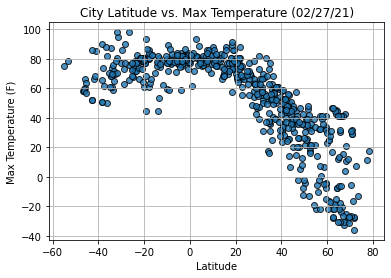

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/Fig1.png")


plt.show()

## Latitude vs. Humidity Plot

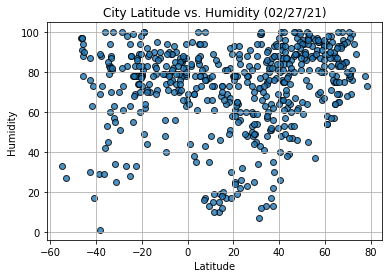

In [13]:
# Build scatter plot for latitude vs. humidity
plt.scatter(lats,humidity,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/Fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

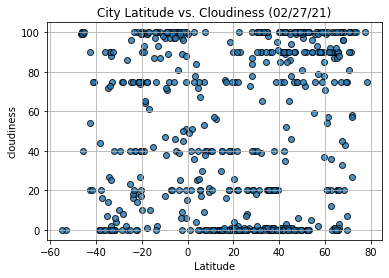

In [14]:
# Build scatter plot for latitude vs. cloudiness 
plt.scatter(lats, cloudiness,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/Fig3.png")

plt.show()



## Latitude vs. Wind Speed Plot

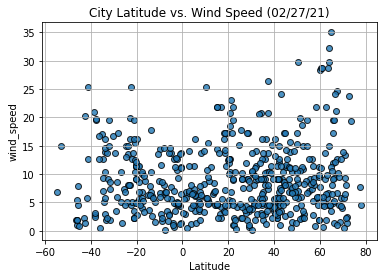

In [48]:
# Build scatter plot for latitude vs. wind_speed 
plt.scatter(lats, wind_speed,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("wind_speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/Fig4.png")

plt.show()



## Linear Regression

In [16]:

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7176586552461116


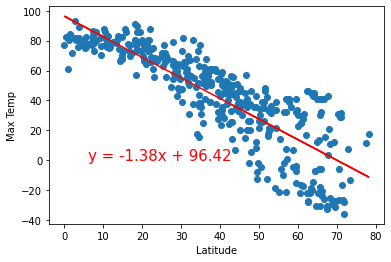

<Figure size 432x288 with 0 Axes>

In [47]:
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,0))
plt.savefig("../output_data/Fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.12387811584293652


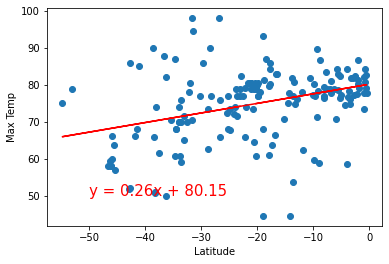

<Figure size 432x288 with 0 Axes>

In [45]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-50, 50))
plt.savefig("../output_data/Fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13118694649914076


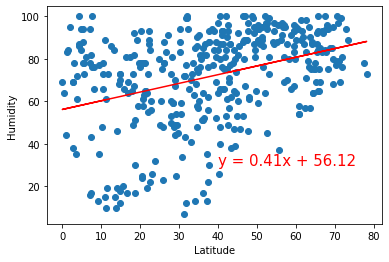

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,30))
plt.savefig("../output_data/Fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04956065873715199


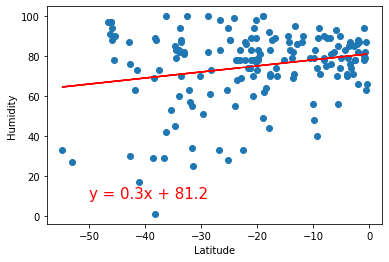

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-50, 9))
plt.savefig("../output_data/Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13306064086362646


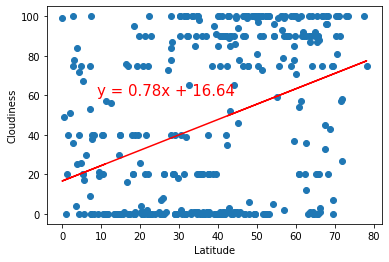

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(9, 60))
plt.savefig("../output_data/Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.058921072653038406


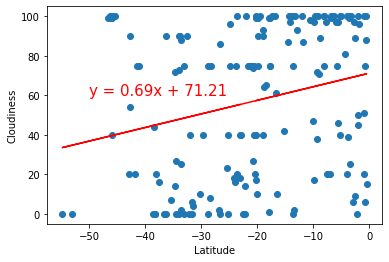

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-50, 60))
plt.savefig("../output_data/Fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.014925216450422113


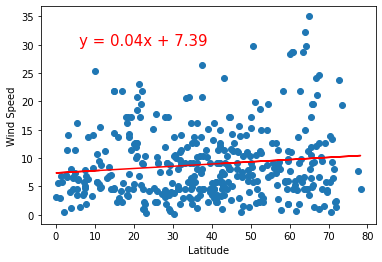

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(6,30))
plt.savefig("../output_data/Fig11.png")



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.016049396121708973


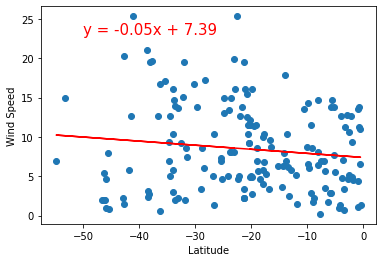

<Figure size 432x288 with 0 Axes>

In [32]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-50, 23))
plt.savefig("../output_data/Fig12.png")